# Loan Status

By: Mohamed Fawzy

In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, Normalizer
from category_encoders import BinaryEncoder, OrdinalEncoder, TargetEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.exceptions import NotFittedError

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.compose import ColumnTransformer

from sklearn.metrics import get_scorer_names, make_scorer, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

import joblib

In [2]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Set the figure size for all plots
sns.set(rc={'figure.figsize':(14, 10)}, font_scale=1.2)

In [3]:
# Read the dataset
df = pd.read_csv('Loan Status.csv')

### Describing Data:

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
for col in df.columns:
    print(f'Unique values for ({col}): {len(df[col].unique())}')

Unique values for (Loan_ID): 614
Unique values for (Gender): 3
Unique values for (Married): 3
Unique values for (Dependents): 5
Unique values for (Education): 2
Unique values for (Self_Employed): 3
Unique values for (ApplicantIncome): 505
Unique values for (CoapplicantIncome): 287
Unique values for (LoanAmount): 204
Unique values for (Loan_Amount_Term): 11
Unique values for (Credit_History): 3
Unique values for (Property_Area): 3
Unique values for (Loan_Status): 2


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Exploration:

In [8]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [12]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [14]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [16]:
for i in df['CoapplicantIncome'].unique():
    print(i)

0.0
1508.0
2358.0
4196.0
1516.0
2504.0
1526.0
10968.0
700.0
1840.0
8106.0
2840.0
1086.0
3500.0
5625.0
1911.0
1917.0
2925.0
2253.0
1040.0
2083.0
3369.0
1667.0
3000.0
2067.0
1330.0
1459.0
7210.0
1668.0
1213.0
2336.0
3440.0
2275.0
1644.0
1167.0
1591.0
2200.0
2250.0
2859.0
3796.0
3449.0
4595.0
2254.0
3066.0
1875.0
1774.0
4750.0
3022.0
4000.0
2166.0
1881.0
2531.0
2000.0
2118.0
4167.0
2900.0
5654.0
1820.0
2302.0
997.0
3541.0
3263.0
3806.0
3583.0
754.0
1030.0
1126.0
3600.0
2333.0
4114.0
2283.0
1398.0
2142.0
2667.0
8980.0
2014.0
1640.0
3850.0
2569.0
1929.0
7750.0
1430.0
2034.0
4486.0
1425.0
1666.0
830.0
3750.0
1041.0
1280.0
1447.0
3166.0
3333.0
1769.0
736.0
1964.0
1619.0
11300.0
1451.0
7250.0
5063.0
2138.0
5296.0
2583.0
2365.0
2816.0
2500.0
1083.0
1250.0
3021.0
983.0
1800.0
1775.0
2383.0
1717.0
2791.0
1010.0
1695.0
2054.0
2598.0
1779.0
1260.0
5000.0
1983.0
5701.0
1300.0
4417.0
4333.0
1843.0
1868.0
3890.0
2167.0
7101.0
2100.0
4250.0
2209.0
3447.0
1387.0
1811.0
1560.0
1857.0
2223.0
1842.0
3274.0

In [17]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [18]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [19]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

## Data Preprocessing:

- Check for duplicate rows

In [20]:
# Check for duplicates
df.duplicated().sum()

0

In [21]:
# Drop duplicates
df.drop_duplicates(inplace=True)

- Check for rows with missing values

In [22]:
# Check for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
# Define a function to calculate the percentage of missing values
def missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round(df.isnull().sum().sort_values(ascending=False)/len(df)*100, 2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Apply the function
missing_values(df)

,Total,Percent
Credit_History,50,8.14
Self_Employed,32,5.21
LoanAmount,22,3.58
Dependents,15,2.44
Loan_Amount_Term,14,2.28
Gender,13,2.12
Married,3,0.49
Loan_ID,0,0.00
Education,0,0.00
ApplicantIncome,0,0.00


- Drop `Loan_ID`

In [24]:
# Drop Loan_ID column
df.drop(['Loan_ID'], axis=1, inplace=True)

- Handle values in `Dependents`

In [25]:
# Define a function to remove + and - signs from the Dependents column
def remove_signs(x):
    if isinstance(x, str):
        return x.replace('+', '').replace('-', '')

# Apply the function
df['Dependents'] = df['Dependents'].apply(remove_signs)

In [26]:
# Convert the Dependents column to numeric
df['Dependents'] = pd.to_numeric(df['Dependents'])

- Handle values in `CoapplicantIncome`

In [27]:
# Round the CoapplicantIncome column to integer
df['CoapplicantIncome'] = df['CoapplicantIncome'].round(0).astype('int64')

- Display data details and types

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    int64  
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 62.4+ KB


In [30]:
for col in df.columns:
    print(f'Unique values for ({col}): {len(df[col].unique())}')

Unique values for (Gender): 3
Unique values for (Married): 3
Unique values for (Dependents): 5
Unique values for (Education): 2
Unique values for (Self_Employed): 3
Unique values for (ApplicantIncome): 505
Unique values for (CoapplicantIncome): 287
Unique values for (LoanAmount): 204
Unique values for (Loan_Amount_Term): 11
Unique values for (Credit_History): 3
Unique values for (Property_Area): 3
Unique values for (Loan_Status): 2


In [31]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245928,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248406,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


### EDA Results:

<Axes: xlabel='Gender', ylabel='count'>

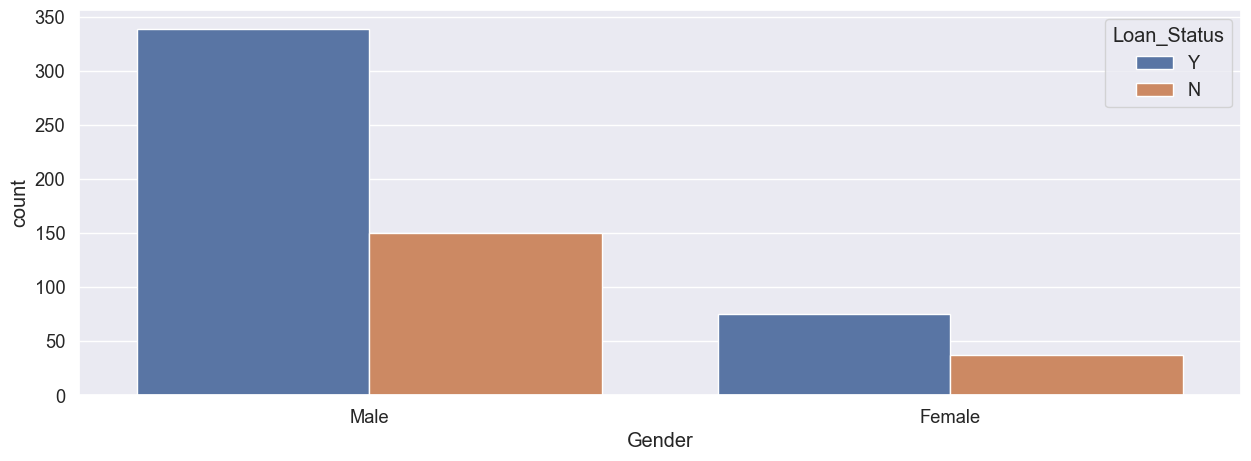

In [32]:
# Show the count of each value in the Gender column
plt.figure(figsize=(15, 5))
sns.countplot(x='Gender', data=df, hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

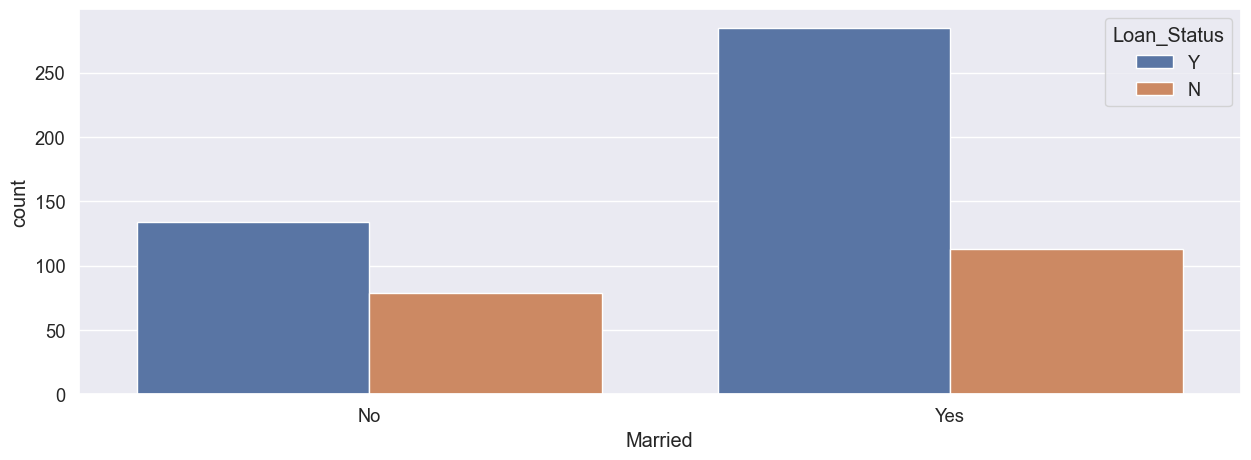

In [33]:
# Show the count of each value in the Married column
plt.figure(figsize=(15, 5))
sns.countplot(x='Married', data=df, hue='Loan_Status')

<Axes: xlabel='Dependents', ylabel='count'>

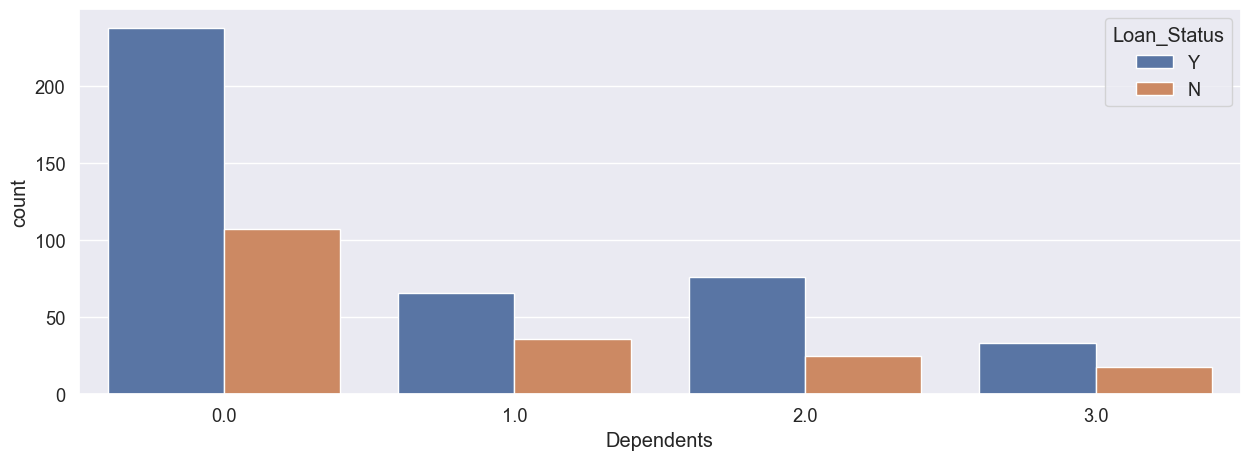

In [34]:
# Show the count of each value in the Dependents column
plt.figure(figsize=(15, 5))
sns.countplot(x='Dependents', data=df, hue='Loan_Status')

<Axes: xlabel='Education', ylabel='count'>

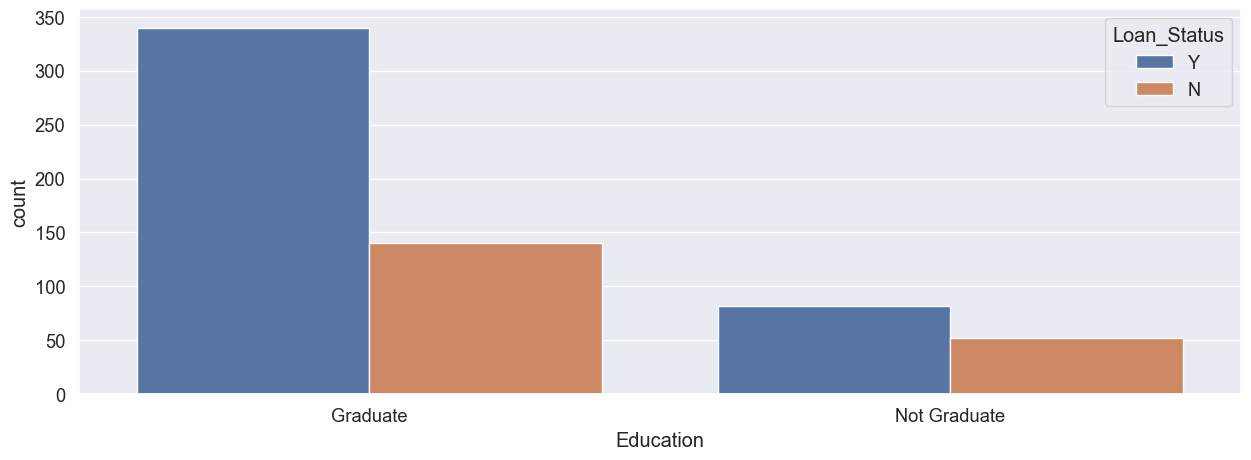

In [35]:
# Show the count of each value in the Education column
plt.figure(figsize=(15, 5))
sns.countplot(x='Education', data=df, hue='Loan_Status')

<Axes: xlabel='Self_Employed', ylabel='count'>

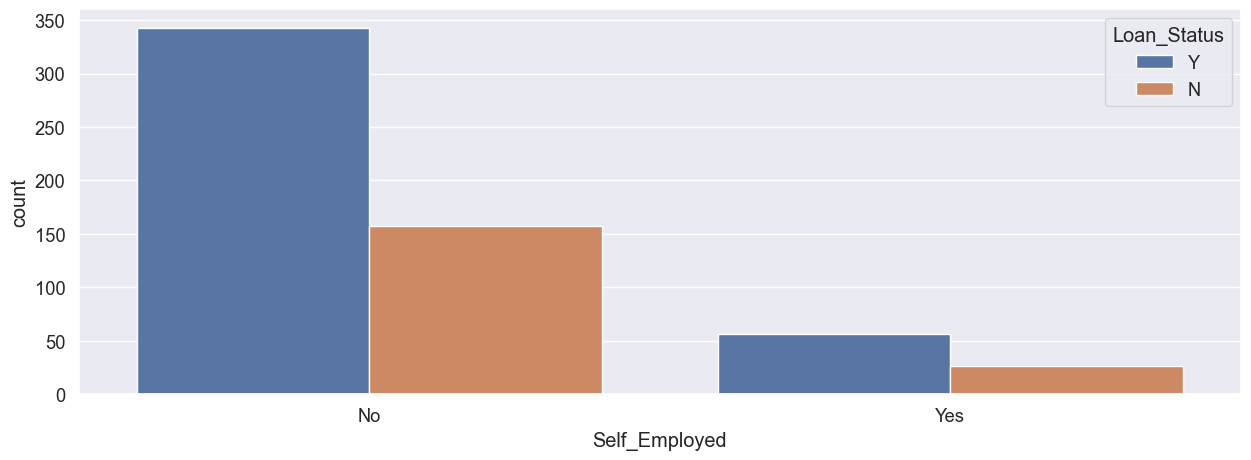

In [36]:
# Show the count of each value in the Self_Employed column
plt.figure(figsize=(15, 5))
sns.countplot(x='Self_Employed', data=df, hue='Loan_Status')

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

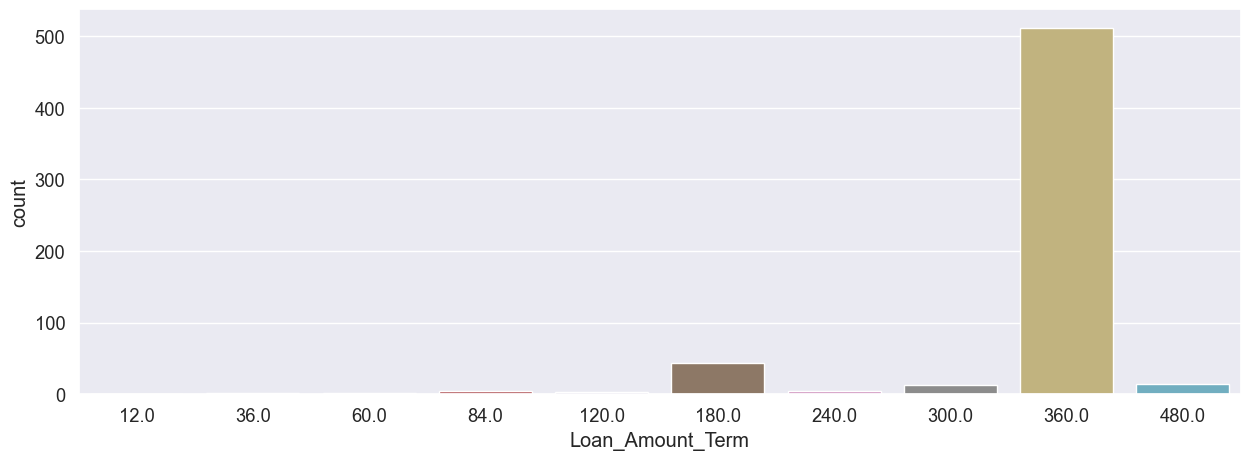

In [37]:
# Show the count of each value in the Loan_Amount_Term column
plt.figure(figsize=(15, 5))
sns.countplot(x='Loan_Amount_Term', data=df)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

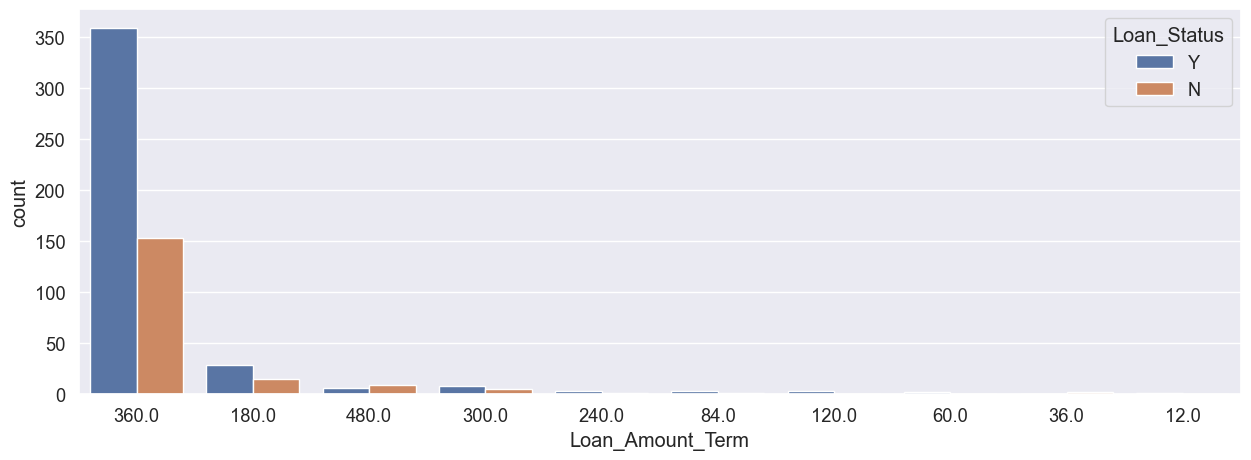

In [38]:
# Show the count of each value in the Loan_Amount_Term column in descending order and hue by Loan_Status
plt.figure(figsize=(15, 5))
sns.countplot(x='Loan_Amount_Term', data=df, order=df['Loan_Amount_Term'].value_counts().index, hue='Loan_Status')

<Axes: xlabel='Credit_History', ylabel='count'>

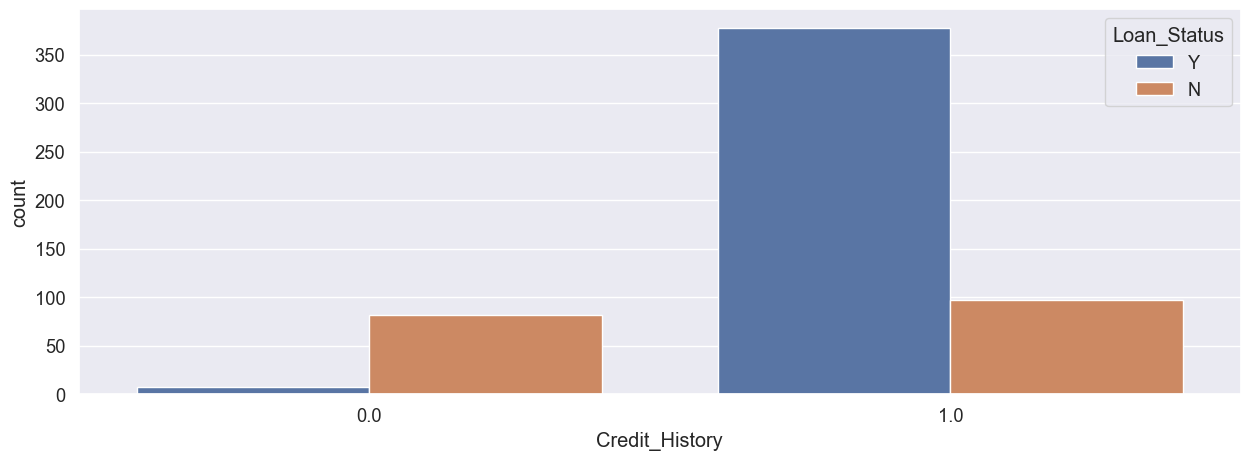

In [39]:
# Show the count of each value in the Credit_History column
plt.figure(figsize=(15, 5))
sns.countplot(x='Credit_History', data=df, hue='Loan_Status')

<Axes: xlabel='Property_Area', ylabel='count'>

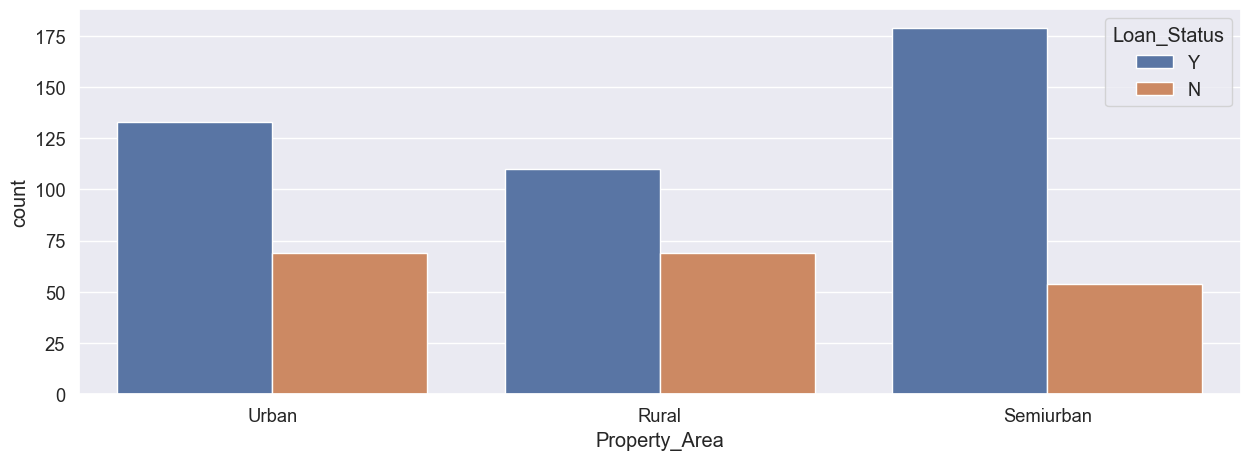

In [40]:
# Show the count of each value in the Property_Area column
plt.figure(figsize=(15, 5))
sns.countplot(x='Property_Area', data=df, hue='Loan_Status')

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

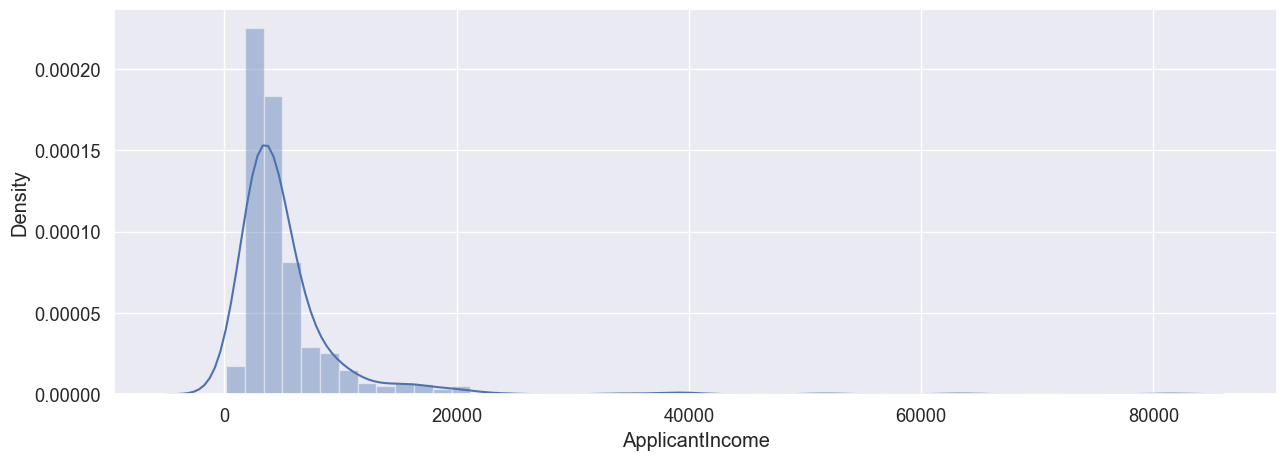

In [41]:
# Show the distribution of the ApplicantIncome column
plt.figure(figsize=(15, 5))
sns.distplot(df['ApplicantIncome'], bins=50)

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

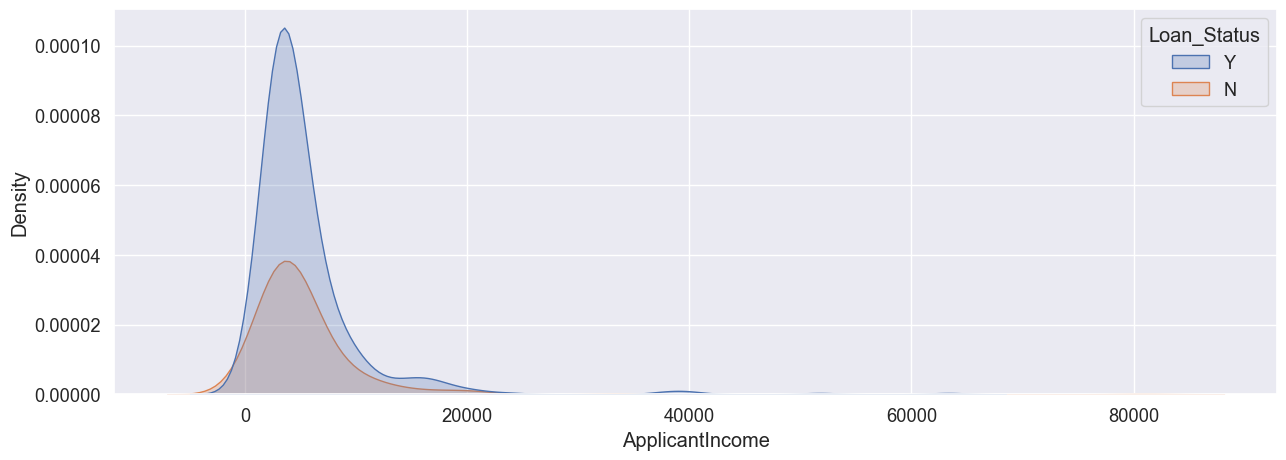

In [42]:
# Show the distribution of the ApplicantIncome column based on the Loan_Status column
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x='ApplicantIncome', hue='Loan_Status', fill=True)

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

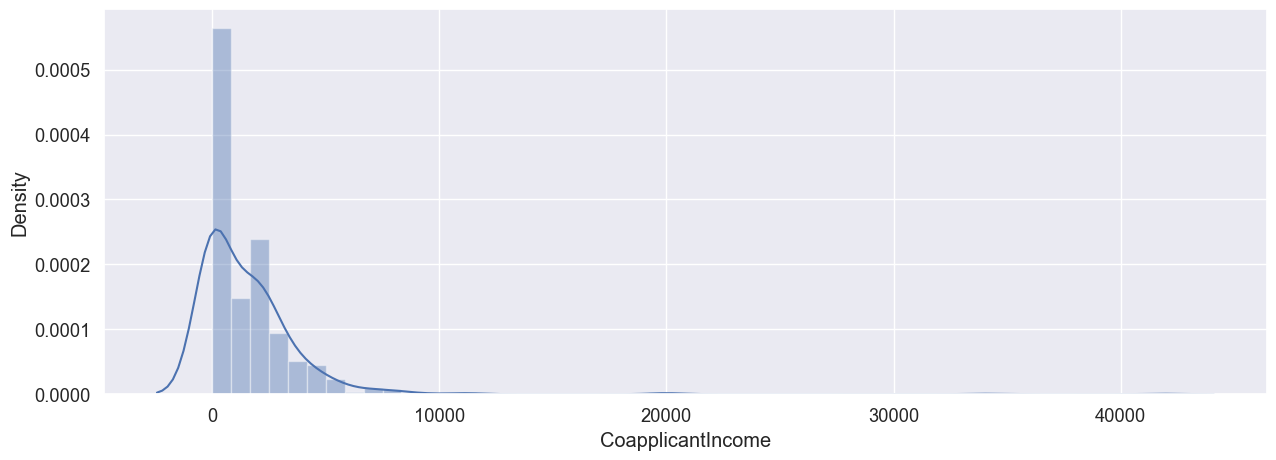

In [43]:
# Show the distribution of the CoapplicantIncome column
plt.figure(figsize=(15, 5))
sns.distplot(df['CoapplicantIncome'], bins=50)

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

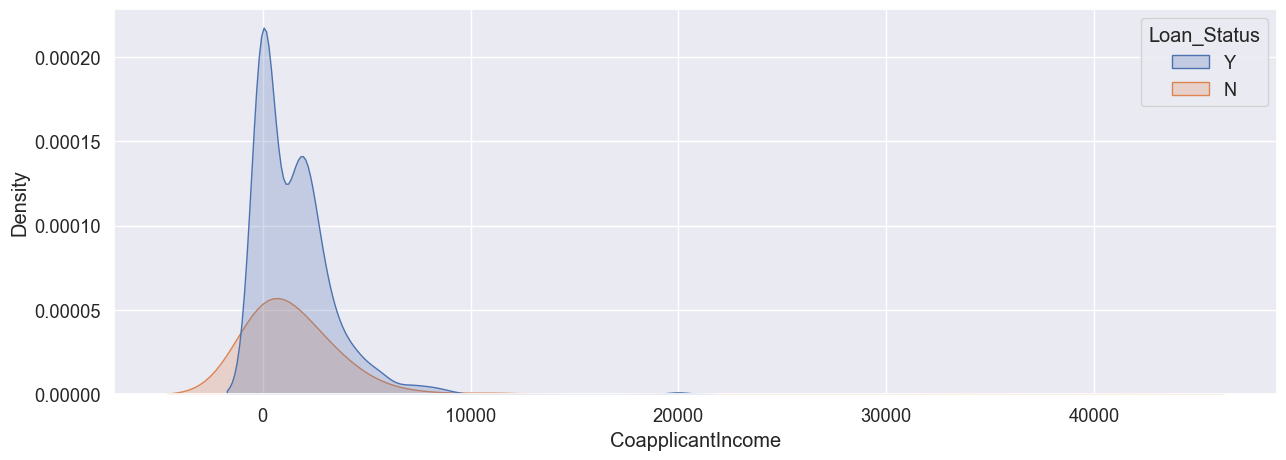

In [44]:
# Show the distribution of the CoapplicantIncome column based on the Loan_Status column
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x='CoapplicantIncome', hue='Loan_Status', fill=True)

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

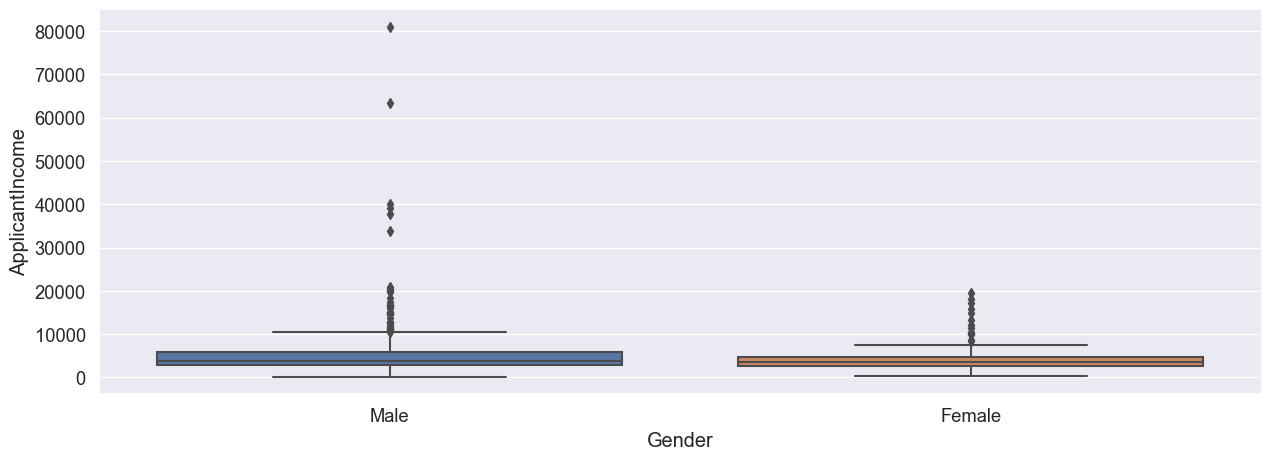

In [45]:
# Show changes in ApplicantIncome based on Gender
plt.figure(figsize=(15, 5))
sns.boxplot(x='Gender', y='ApplicantIncome', data=df)

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

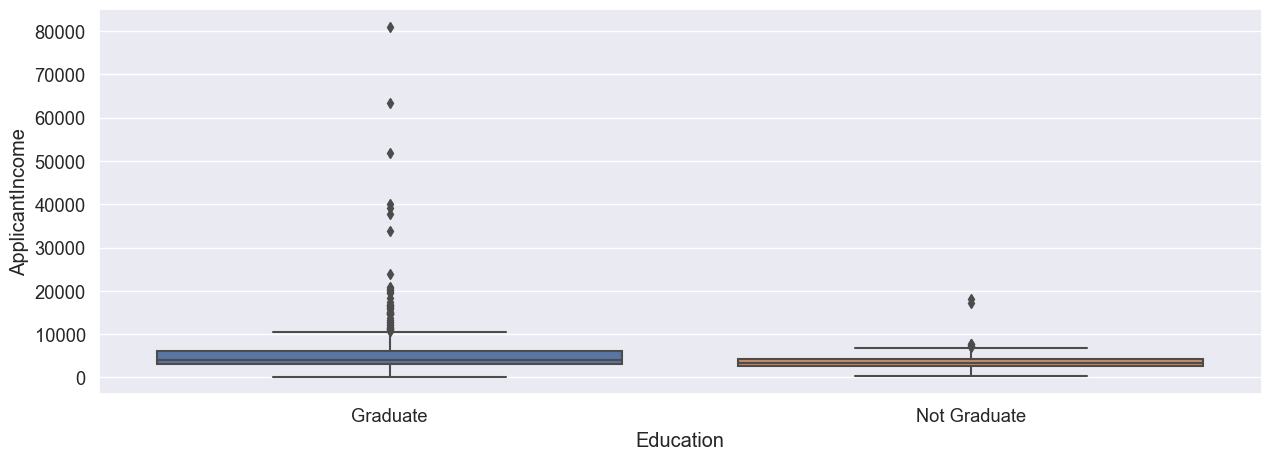

In [46]:
# Show changes in ApplicantIncome based on Education
plt.figure(figsize=(15, 5))
sns.boxplot(x='Education', y='ApplicantIncome', data=df)

<Axes: xlabel='Gender', ylabel='CoapplicantIncome'>

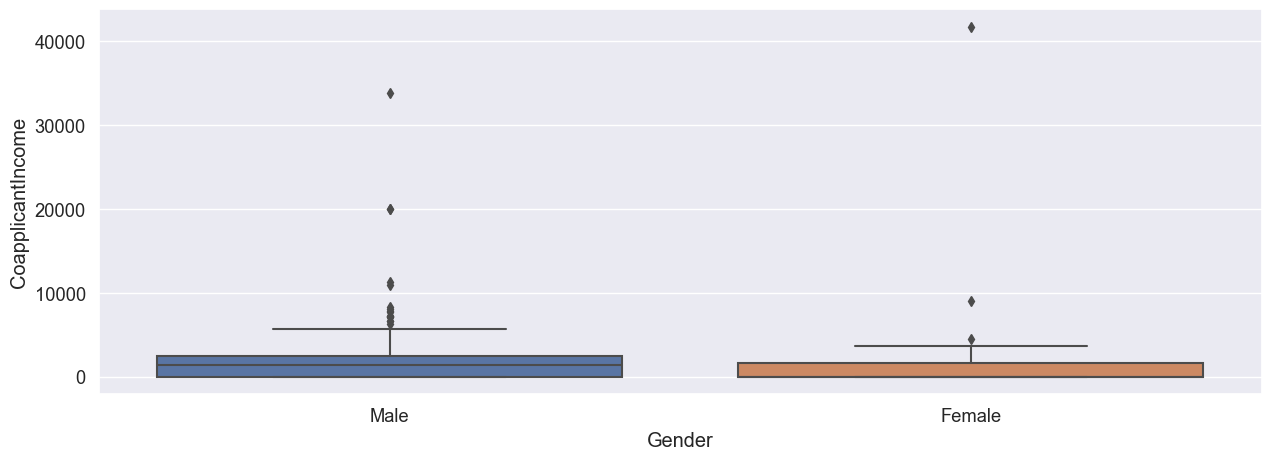

In [47]:
# Show changes in CoapplicantIncome based on Gender
plt.figure(figsize=(15, 5))
sns.boxplot(x='Gender', y='CoapplicantIncome', data=df)

<Axes: xlabel='Education', ylabel='CoapplicantIncome'>

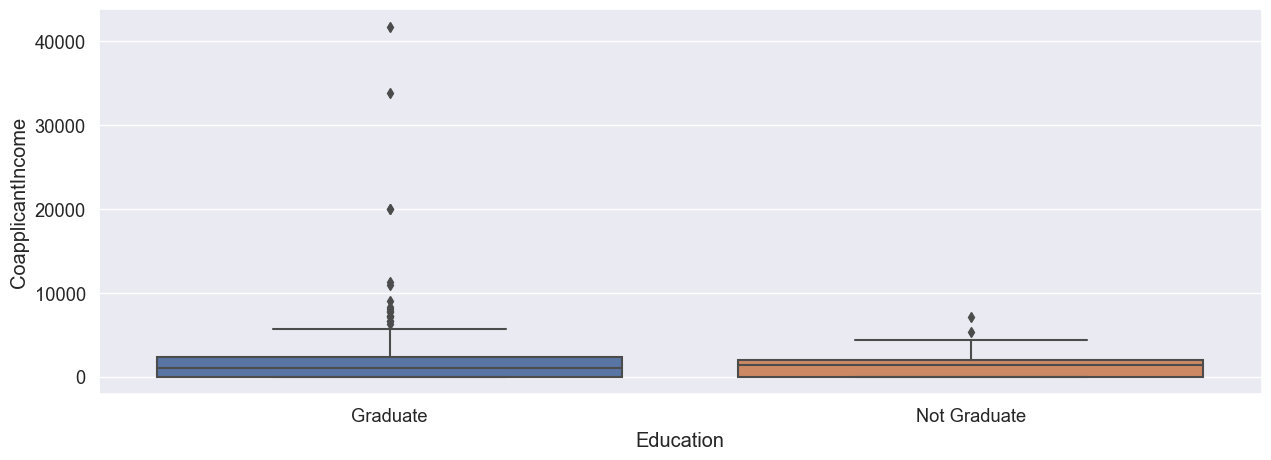

In [48]:
# Show changes in CoapplicantIncome based on Education
plt.figure(figsize=(15, 5))
sns.boxplot(x='Education', y='CoapplicantIncome', data=df)

<Axes: xlabel='LoanAmount', ylabel='Density'>

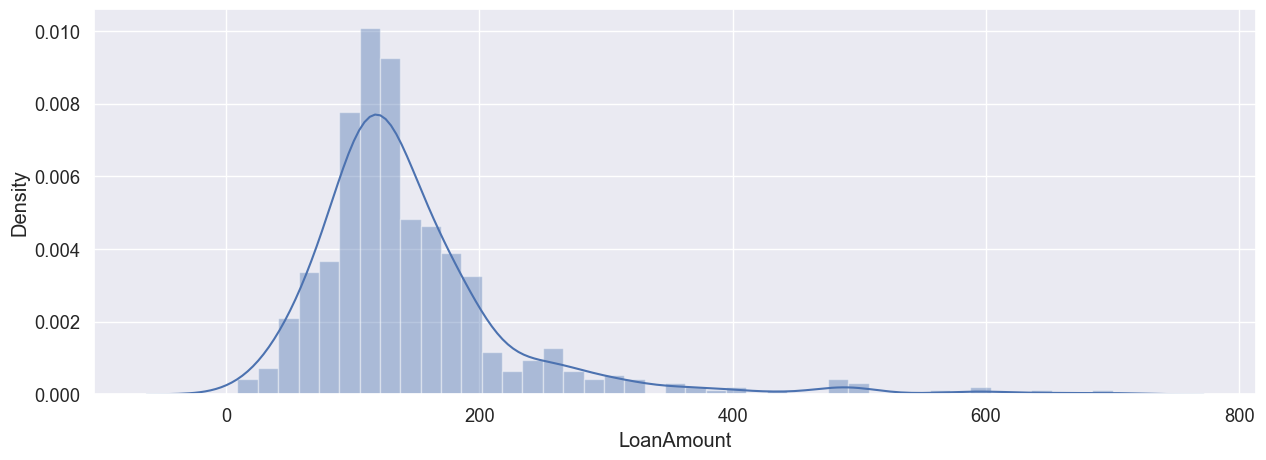

In [49]:
# Show the distribution of the LoanAmount column
plt.figure(figsize=(15, 5))
sns.distplot(df['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

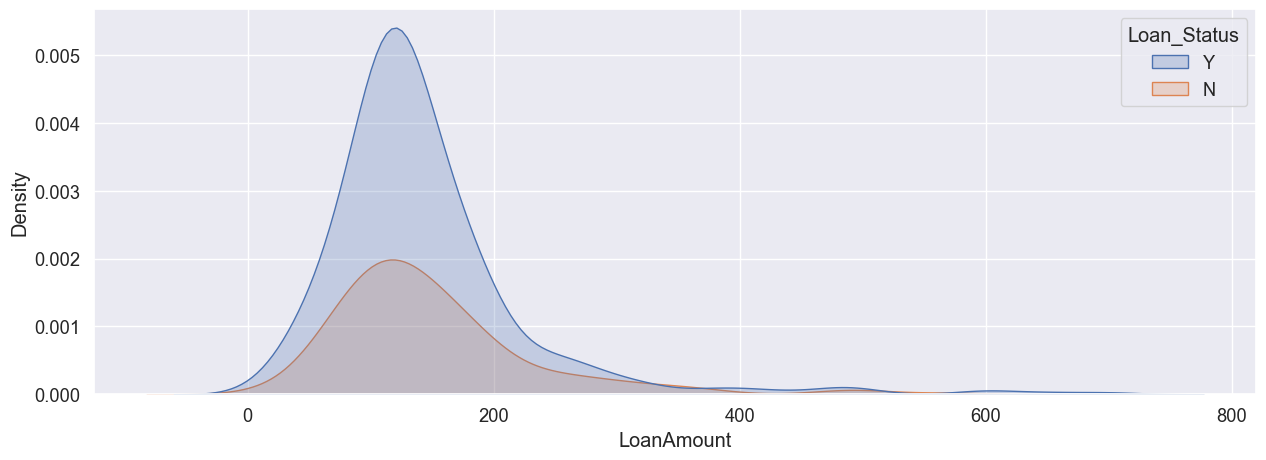

In [50]:
# Show the distribution of the LoanAmount column based on the Loan_Status column
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x='LoanAmount', hue='Loan_Status', fill=True)

<Axes: xlabel='Loan_Status', ylabel='count'>

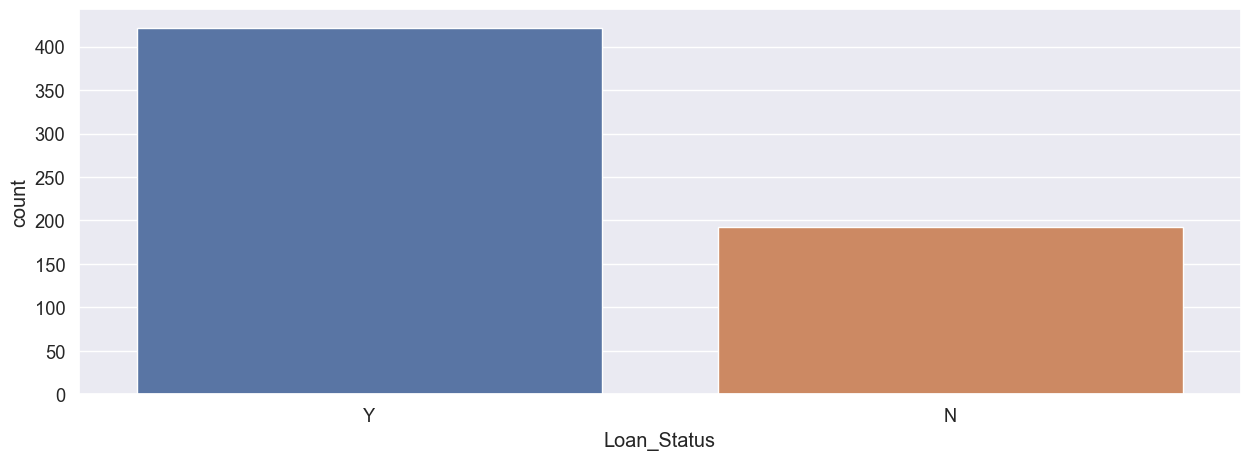

In [51]:
# Show if there is an inbalance in the Loan_Status column
plt.figure(figsize=(15, 5))
sns.countplot(x='Loan_Status', data=df)

In [52]:
# Convert Loan_Status to numeric
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

- Remove outliers from the data

In [53]:
# Remove outliers from the ApplicantIncome column
df = df[df['ApplicantIncome'] <= 40000]

# Remove outliers from the CoapplicantIncome column
df = df[df['CoapplicantIncome'] <= 20000]

# Remove outliers from the LoanAmount column
df = df[(df['LoanAmount'] <= 600) | (df['LoanAmount'].isnull())]

- Reset Index

In [54]:
# Reset the index of the dataframe rows
df.reset_index(drop=True, inplace=True)

### Feature Selection:

- Prepare the data for feature selection process

In [55]:
# Create a copy of the dataframe
df_feature_selection = df.copy()

- Convert categorical columns to numeric

In [56]:
# Define a function to convert Gender column to numeric
def gender(x):
    options = {'Male': 1, 'Female': 0}
    try:
        return options[x]
    except:
        return x

# Apply the function
df_feature_selection['Gender'] = df_feature_selection['Gender'].apply(gender)


# Define a function to convert Married column to numeric
def married(x):
    options = {'Yes': 1, 'No': 0}
    try:
        return options[x]
    except:
        return x

# Apply the function
df_feature_selection['Married'] = df_feature_selection['Married'].apply(married)


# Define a function to convert Education column to numeric
def education(x):
    options = {'Graduate': 1, 'Not Graduate': 0}
    return options[x]

# Apply the function
df_feature_selection['Education'] = df_feature_selection['Education'].apply(education)


# Define a function to convert Self_Employed column to numeric
def self_employed(x):
    options = {'Yes': 1, 'No': 0}
    try:
        return options[x]
    except:
        return x

# Apply the function
df_feature_selection['Self_Employed'] = df_feature_selection['Self_Employed'].apply(self_employed)


# Define a function to convert Property_Area column to numeric
def property_area(x):
    options = {'Semiurban': 2, 'Urban': 1, 'Rural': 0}
    return options[x]

# Apply the function
df_feature_selection['Property_Area'] = df_feature_selection['Property_Area'].apply(property_area)

- Get correlations between the features

In [57]:
features = df_feature_selection[list(df.columns)]

<Axes: >

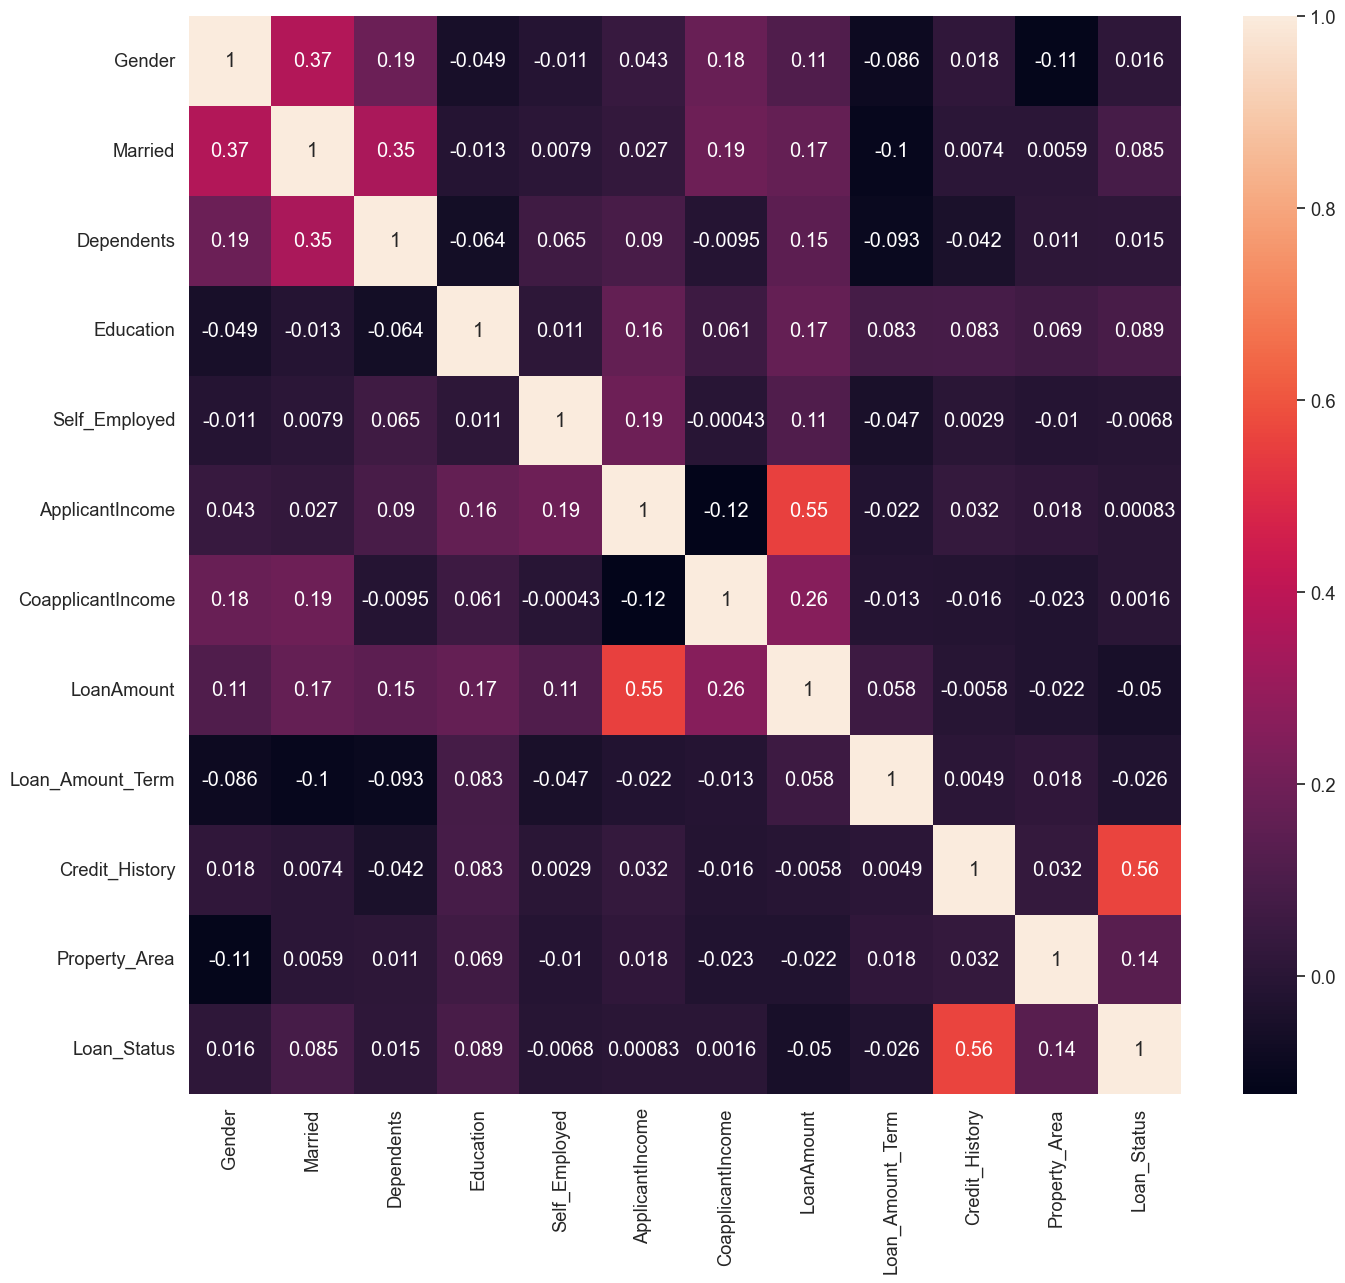

In [58]:
corr = features.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True)

- Drop `Self_Employed`, `ApplicantIncome`, `CoapplicantIncome`

In [59]:
df.drop(['Self_Employed', 'ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

- Display data details and types

In [60]:
df.head()

,Gender,Married,Dependents,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,NaN,360.0,1.0,Urban,1
1,Male,Yes,1.0,Graduate,128.0,360.0,1.0,Rural,0
2,Male,Yes,0.0,Graduate,66.0,360.0,1.0,Urban,1
3,Male,Yes,0.0,Not Graduate,120.0,360.0,1.0,Urban,1
4,Male,No,0.0,Graduate,141.0,360.0,1.0,Urban,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            596 non-null    object 
 1   Married           605 non-null    object 
 2   Dependents        593 non-null    float64
 3   Education         608 non-null    object 
 4   LoanAmount        586 non-null    float64
 5   Loan_Amount_Term  594 non-null    float64
 6   Credit_History    560 non-null    float64
 7   Property_Area     608 non-null    object 
 8   Loan_Status       608 non-null    int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 42.9+ KB


In [62]:
for col in df.columns:
    print(f'Unique values for ({col}): {len(df[col].unique())}')

Unique values for (Gender): 3
Unique values for (Married): 3
Unique values for (Dependents): 5
Unique values for (Education): 2
Unique values for (LoanAmount): 199
Unique values for (Loan_Amount_Term): 11
Unique values for (Credit_History): 3
Unique values for (Property_Area): 3
Unique values for (Loan_Status): 2


In [63]:
df.describe()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,593.000000,586.000000,594.000000,560.000000,608.000000
mean,0.755481,143.406143,342.323232,0.842857,0.689145
std,1.006352,77.960425,64.488570,0.364261,0.463225
min,0.000000,9.000000,12.000000,0.000000,0.000000
25%,0.000000,100.000000,360.000000,1.000000,0.000000
50%,0.000000,127.000000,360.000000,1.000000,1.000000
75%,2.000000,165.000000,360.000000,1.000000,1.000000
max,3.000000,600.000000,480.000000,1.000000,1.000000


### Machine Learning Models:

- Model Selection (using pipeline)

In [64]:
# Split the data into features and target
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

- Transformers

In [65]:
# Define the columns that need imputing and encoding
impute_encode_cols = ['Gender', 'Married']

In [66]:
# Define the imputer and encoder transformers
imputer = KNNImputer(n_neighbors=3)
encoder = OrdinalEncoder(cols=['Gender', 'Married'], mapping=[{'col':'Gender', 'mapping':{'Male':1, 'Female':0}}, {'col':'Married', 'mapping':{'Yes':1, 'No':0}}])

In [67]:
# Define the pipeline for imputing and encoding
impute_encode_pipeline = Pipeline([('encoder', encoder), ('imputer', imputer)])

In [68]:
# Define the column transformer to apply imputing and encoding to the specified columns
Preprocessor = ColumnTransformer(transformers=[('impute_encode', impute_encode_pipeline, impute_encode_cols), ('IMP', KNNImputer(n_neighbors=5), ['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']), ('OE', OrdinalEncoder(cols=['Education', 'Property_Area'], mapping=[{'col':'Education', 'mapping':{'Graduate':1, 'Not Graduate':0}}, {'col':'Property_Area', 'mapping':{'Semiurban':2, 'Urban':1, 'Rural':0}}]), ['Education', 'Property_Area'])], remainder='passthrough')

- Models

In [69]:
models = []
models.append(('RandomForest', RandomForestClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('LightGBM', LGBMClassifier()))
models.append(('CatBoost', CatBoostClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier()))

In [70]:
# Show the models accuracy
for name, model in models:
    
    steps = []
    steps.append(('Preprocessor', Preprocessor))
    steps.append(('Power', PowerTransformer()))
    steps.append(('Standardize', RobustScaler()))
    steps.append(('Model', model))
    pipeline = Pipeline(steps=steps)
    
    results = cross_validate(pipeline, x, y, cv=10, scoring='accuracy', return_train_score=True, error_score='raise', n_jobs=-1)
    train_accuracy = results['train_score'].mean()
    test_accuracy = results['test_score'].mean()

    print(" ".join(["For", name, "Algorithm..."]))
    print("Best train accuracy is %f" % train_accuracy, "Best test accuracy is %f" % test_accuracy, sep="\n")
    print()

For RandomForest Algorithm...
Best train accuracy is 0.991777
Best test accuracy is 0.768033

For XGBoost Algorithm...
Best train accuracy is 0.964547
Best test accuracy is 0.750109

For LightGBM Algorithm...
Best train accuracy is 0.909176
Best test accuracy is 0.763224

For CatBoost Algorithm...
Best train accuracy is 0.868604
Best test accuracy is 0.799399

For AdaBoost Algorithm...
Best train accuracy is 0.836441
Best test accuracy is 0.797596

For GradientBoosting Algorithm...
Best train accuracy is 0.867691
Best test accuracy is 0.787869



- `CatBoostClassifier` (hyperparameter tuning)

In [71]:
params = {
    'CatBoost__random_state': [17],
    'CatBoost__iterations': [97],
    'CatBoost__max_depth': [1],
    'CatBoost__learning_rate': [0.7],
    'CatBoost__silent': [True]
}

In [72]:
steps = []
steps.append(('Preprocessor', Preprocessor))
steps.append(('Power', PowerTransformer()))
steps.append(('Standardize', RobustScaler()))
steps.append(('CatBoost', CatBoostClassifier()))
pipeline = Pipeline(steps=steps)

In [73]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=params, cv=10, scoring='accuracy', return_train_score=True, n_jobs=-1)

In [74]:
grid_search.fit(x, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_encode',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OrdinalEncoder(cols=['Gender',
                                                                                                               'Married'],
                                                                                                         mapping=[{'col': 'Gender',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': Male      1
Female    0
dtype: int64},
                                                                                                                  {'col': 'Married',
                                                                                                                   'data_type': dtype('O'),
                                                                                                                   'mapping': Yes    1
No     0
dtype: in...
                                                                          'Property_Area'])])),
                                       ('Power', PowerTransformer()),
                                       ('Standardize', RobustScaler()),
                                       ('CatBoost',
                                        <catboost.core.CatBoostClassifier object at 0x000001FD6F8FB310>)]),
             n_jobs=-1,
             param_grid={'CatBoost__iterations': [97],
                         'CatBoost__learning_rate': [0.7],
                         'CatBoost__max_depth': [1],
                         'CatBoost__random_state': [17],
                         'CatBoost__silent': [True]},
             return_train_score=True, scoring='accuracy')

In [75]:
print(f"Train: {grid_search.cv_results_['mean_train_score'].mean()}, Test: {grid_search.cv_results_['mean_test_score'].mean()}")

Train: 0.8227324890911275, Test: 0.814207650273224


In [76]:
final_model = grid_search.best_estimator_

### Deployment:

- Create new data row for prediction

In [77]:
for s, p in zip((grid_search.cv_results_['mean_test_score']), (grid_search.cv_results_['params'])):
    print(f'Mean Test Score: {s}, Parameters: {p}')

Mean Test Score: 0.814207650273224, Parameters: {'CatBoost__iterations': 97, 'CatBoost__learning_rate': 0.7, 'CatBoost__max_depth': 1, 'CatBoost__random_state': 17, 'CatBoost__silent': True}


In [78]:
GS_Results = pd.DataFrame(grid_search.cv_results_['rank_test_score'], columns=['Rank'])
GS_Results['Mean Test Score'] = grid_search.cv_results_['mean_test_score']
GS_Results['Learning Rate'] = grid_search.cv_results_['params'][0]['CatBoost__learning_rate']
GS_Results['Max Depth'] = grid_search.cv_results_['params'][0]['CatBoost__max_depth']
GS_Results['Iterations'] = grid_search.cv_results_['params'][0]['CatBoost__iterations']
GS_Results['Random State'] = grid_search.cv_results_['params'][0]['CatBoost__random_state']
GS_Results

,Rank,Mean Test Score,Learning Rate,Max Depth,Iterations,Random State
0,1,0.814208,0.7,1,97,17


In [79]:
GS_Results = GS_Results.sort_values(by=['Rank'])
GS_Results

,Rank,Mean Test Score,Learning Rate,Max Depth,Iterations,Random State
0,1,0.814208,0.7,1,97,17


In [80]:
GS_Results[GS_Results['Mean Test Score'] == GS_Results['Mean Test Score'].max()]

,Rank,Mean Test Score,Learning Rate,Max Depth,Iterations,Random State
0,1,0.814208,0.7,1,97,17


In [81]:
# features dataframe
x

,Gender,Married,Dependents,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,NaN,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,128.0,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,66.0,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,120.0,360.0,1.0,Urban
4,Male,No,0.0,Graduate,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...
603,Female,No,0.0,Graduate,71.0,360.0,1.0,Rural
604,Male,Yes,3.0,Graduate,40.0,180.0,1.0,Rural
605,Male,Yes,1.0,Graduate,253.0,360.0,1.0,Urban
606,Male,Yes,2.0,Graduate,187.0,360.0,1.0,Urban


In [82]:
# Inputs needed for prediction
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [83]:
# Create virtual inputs to form a new data row to use it in testing the model
gender = input('Gender: ')
married = input('Married: ')
dependents = int(input('Dependents: '))
education = input('Education: ')
loan_amount = int(input('Loan Amount: '))
loan_amount_term = int(input('Loan Amount Term: '))
credit_history = int(input('Credit History: '))
property_area = input('Property Area: ')

# Create a list of inputs
row_data = [gender, married, dependents, education, loan_amount, loan_amount_term, credit_history, property_area]

# Print the list values
print(row_data)

['Male', 'Yes', 2, 'Graduate', 187, 360, 1, 'Urban']


In [84]:
# Convert row_data to a DataFrame
df_test = pd.DataFrame([row_data], columns=x.columns)

In [85]:
# Predict the price using the final_model
final_model.predict(df_test)

array([1], dtype=int64)

In [86]:
# Save the model and inputs
joblib.dump(final_model, "model.h5")
joblib.dump(x.columns, "inputs.h5")

['inputs.h5']

In [87]:
# Load the model
mo = joblib.load("model.h5")

In [88]:
# Predict the price of a flight
mo.predict(df_test)

array([1], dtype=int64)